# Ryan Timbrook
## Data Science 450, Spring 2017
## Date: 05/10/2017
## Assignment 3


# Use K-means clustering algorithm to cluster user sessions of an online shopping site into segments.

Try different clustering runs with various numbers of clusters (e.g., between 4 and 8), and select the result set(s) that seem to best answer as many of the following questions as possible

## Question 1:
If a new user is observed to access the following pages: Home => Search => Prod_B
### Q1.a: According to your clusters, what other product should be recommended to this user?
### Q1.b: What if the new user has accessed the following sequence instead: Products => Prod_C?


## Question 2: 
### Can clustering help us identify:
*	casual browsers ("window shoppers")
*	focused browsers (those who seem to know what products they are looking for)
*	searchers (those using the search function to ﬁnd items they want)? 
### If so, are any of these groups show a higher or lower propensity to make a purchase?


In [1]:
# Clear objects from Memory
rm(list=ls())
# Clear Console:
cat("\014")

# Read Data Source
read.data = function(file=file){
  read.csv(file,header = TRUE,stringsAsFactors = FALSE)
}
sessions.df = read.data('Sessions.csv')

In [2]:
if(!require(factoextra)){install.packages("factoextra")}
names(sessions.df)
nrow(sessions.df)
str(sessions.df)

head(sessions.df)

Loading required package: factoextra
Loading required package: ggplot2


[1] "Home"     "Products" "Search"   "Prod_A"   "Prod_B"   "Prod_C"   "Cart"    
[8] "Purchase"

[1] 100

'data.frame':	100 obs. of  8 variables:
 $ Home    : int  1 1 1 1 1 1 1 1 1 1 ...
 $ Products: int  0 1 0 1 0 1 0 0 1 0 ...
 $ Search  : int  0 1 0 1 1 1 1 1 1 1 ...
 $ Prod_A  : int  0 0 0 1 1 0 0 0 0 1 ...
 $ Prod_B  : int  0 0 0 0 1 1 0 1 1 1 ...
 $ Prod_C  : int  0 0 0 0 0 0 0 0 0 1 ...
 $ Cart    : int  0 1 0 1 1 0 1 0 1 1 ...
 $ Purchase: int  0 0 0 1 1 0 1 0 0 1 ...


Home,Products,Search,Prod_A,Prod_B,Prod_C,Cart,Purchase
1,0,0,0,0,0,0,0
1,1,1,0,0,0,1,0
1,0,0,0,0,0,0,0
1,1,1,1,0,0,1,1
1,0,1,1,1,0,1,1
1,1,1,0,1,0,0,0


# K-means Partitioning
A plot of the within groups sum of squares by number of clusters extracted can help determine the appropriate number of clusters

Credits: http://www.statmethods.net/advstats/cluster.html

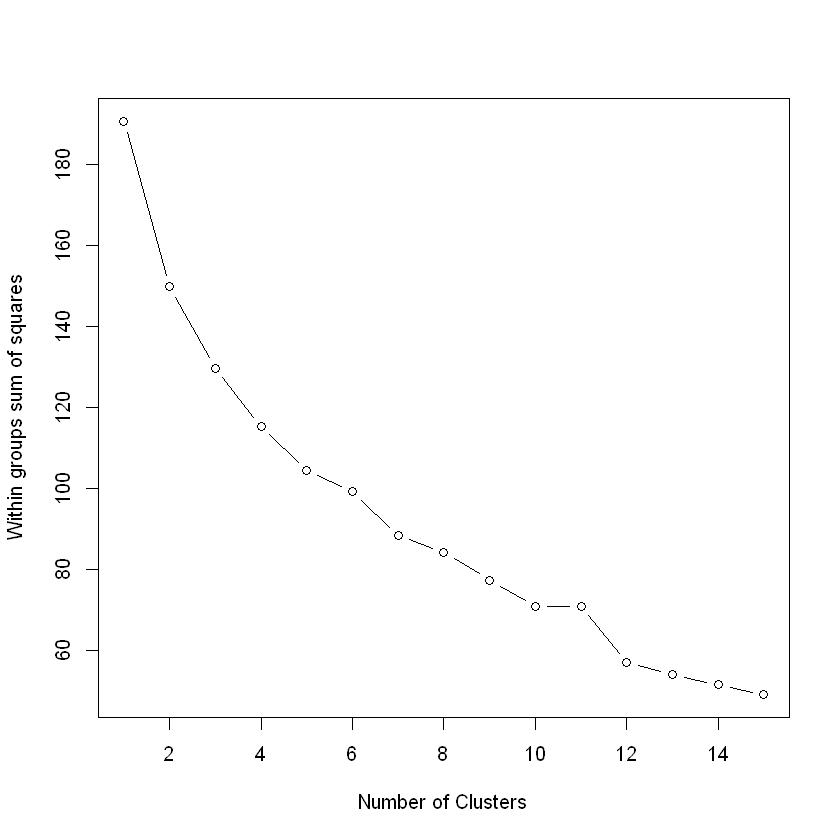

In [3]:
#Determine number of clusters
wss = (nrow(sessions.df)-1)*sum(apply(sessions.df,2,var))

for(i in 2:15) wss[i] = sum(kmeans(sessions.df,centers=i)$withinss)
plot(1:15,wss,type='b',xlab="Number of Clusters", ylab="Within groups sum of squares")

# K-means Cluster Analysis
The nstart argument teslls kmeans to try that many random starts and keep the best.
With 20 or 25 random starts, you'll generally find the overall best solution.
Credit: R12.KMC

In [4]:
sessions.4m1 = kmeans(sessions.df,4,nstart=25) # 4 clusters
sessions.4m2 = kmeans(sessions.df,4,nstart=25)
sessions.4m1



K-means clustering with 4 clusters of sizes 22, 29, 25, 24

Cluster means:
       Home  Products    Search     Prod_A    Prod_B    Prod_C      Cart
1 0.8636364 0.5454545 1.0000000 0.63636364 0.2272727 0.5000000 1.0000000
2 0.0000000 1.0000000 0.3103448 0.03448276 1.0000000 0.6551724 0.4827586
3 0.7600000 0.7600000 0.0000000 0.92000000 0.4400000 0.2800000 1.0000000
4 0.9166667 0.5000000 0.5000000 0.62500000 0.4166667 0.3333333 0.0000000
   Purchase
1 0.6363636
2 0.3103448
3 0.6400000
4 0.0000000

Clustering vector:
  [1] 4 1 4 1 1 4 1 4 1 1 1 4 1 1 4 1 1 1 4 4 1 1 3 4 3 4 3 3 4 3 3 4 3 4 3 4 3
 [38] 2 2 2 2 2 2 2 2 2 2 1 4 1 1 1 3 4 2 3 4 4 3 3 1 4 3 1 3 4 4 3 4 3 1 3 3 4
 [75] 3 3 3 1 3 4 3 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2

Within cluster sum of squares by cluster:
[1] 27.59091 27.17241 27.92000 30.62500
 (between_SS / total_SS =  40.6 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter" 

In [6]:
#plot(sessions.df,pch=sessions.4m1$cluster, col=sessions.4m1$cluster)
#points(sessions.df,pch=sessions.4m2$cluster+3, col=sessions.4m2$cluster)

In [7]:

#get cluster means
#aggregate(sessions.4m1,by=list(sessions.4m1$cluster),FUN=mean)
#append cluster assignment
#sessions.4m1 = data.frame(sessions.4m1,sessions.4m1$cluster)
#head(sessions.df)

# Plot Cluster

Loading required package: cluster


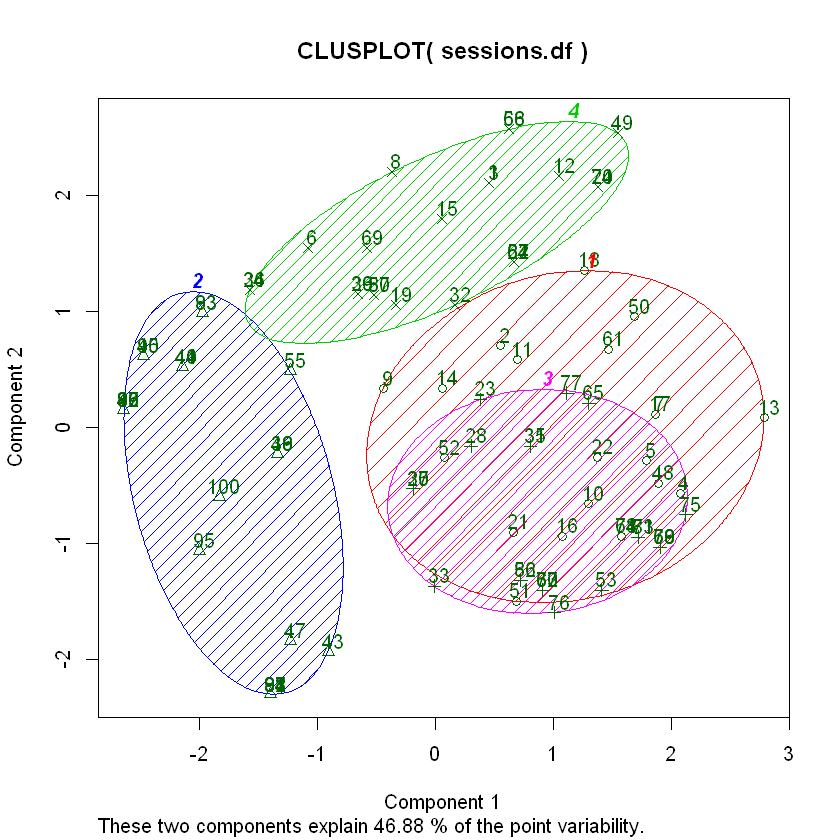

In [8]:
if(!require(cluster)){install.packages("cluster")}
#plot cluster
clusplot(sessions.df,sessions.4m1$cluster,color=TRUE,shade=TRUE,labels=2,lines=0)


x,y
2.1415443,0.3521806
0.3010342,0.6685520
2.6218040,-0.8024843
1.3213860,1.2390889
-0.9119730,-0.0835273
1.9843365,1.4847659


[1] 198

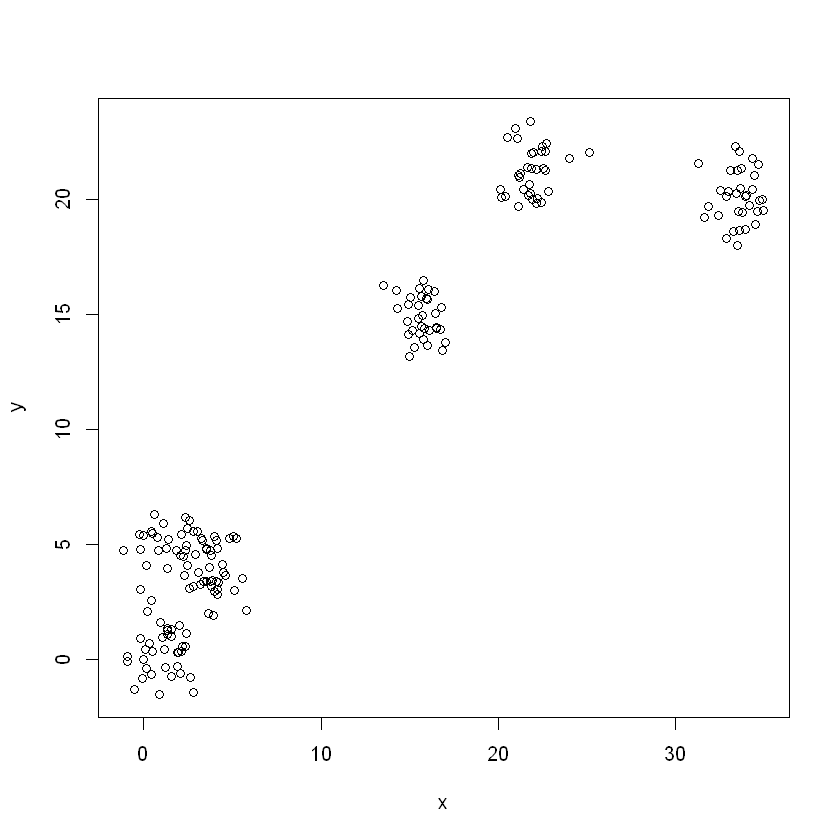

In [51]:
#Finding K
n = 200
g = 6
set.seed(g)
k.find.df = data.frame(x = unlist(lapply(1:g, function(i) rnorm(n/g, runif(1)*i^2))),
                y = unlist(lapply(1:g, function(i) rnorm(n/g, runif(1)*i^2))))
head(k.find.df)
nrow(k.find.df)
plot(k.find.df)

In [11]:
sessions.df.scaled = scale(sessions.df)
set.seed(777)
km.scalled.4m = kmeans(sessions.df.scaled,4,nstart=25)
km.scalled.4m$cluster

[1] 4 3 4 2 2 3 2 3 3 2 3 3 2 3 3 2 2 3 4 4 2 2 4 4 4 3 4 4 3 4 4 4 2 3 4 3 2
 [38] 1 1 1 1 1 1 1 1 1 1 2 3 3 2 3 2 4 4 2 4 3 2 2 3 4 2 2 4 3 4 2 3 2 2 2 2 4
 [75] 2 2 4 2 2 4 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

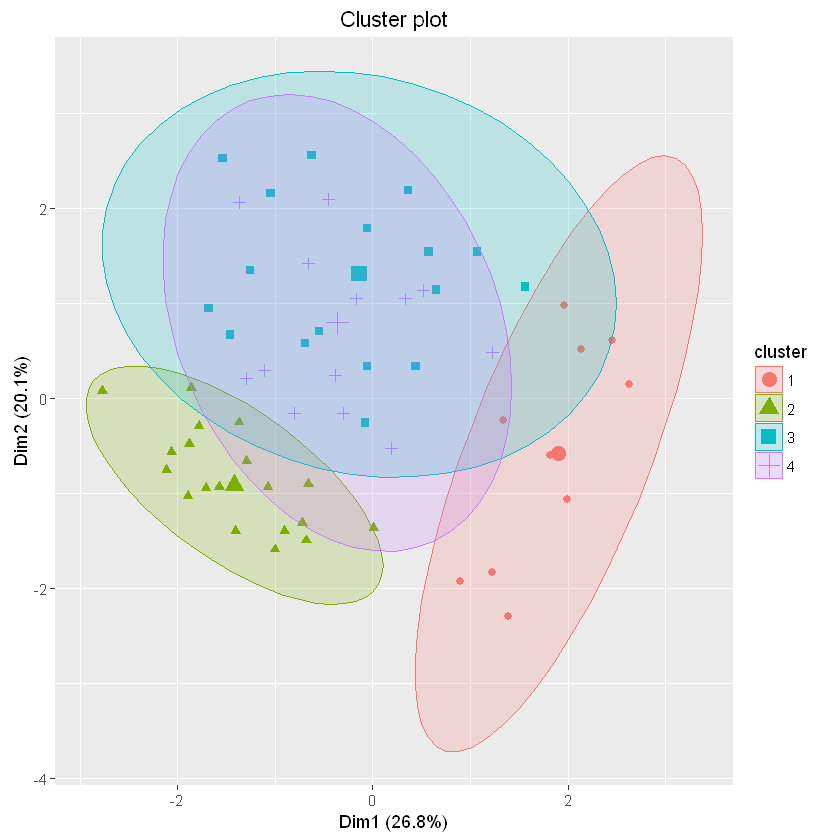

In [12]:
#Visualize k-means clusters
fviz_cluster(km.scalled.4m,data=sessions.df.scaled,geom='point',stand=FALSE,frame.type = 'norm')

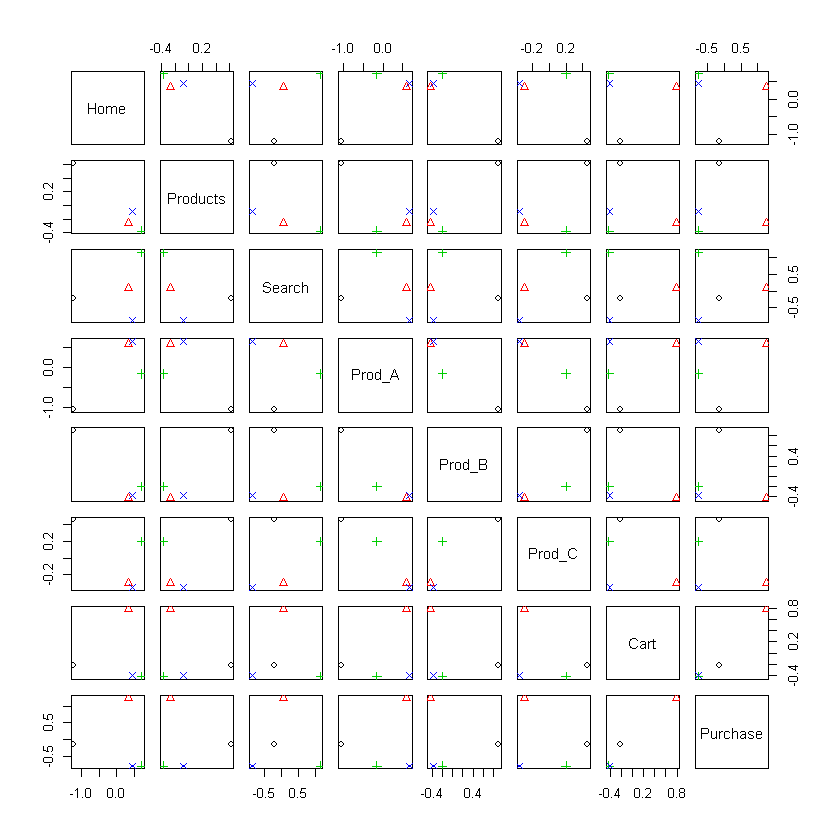

In [13]:
pairs(km.scalled.4m$centers, pch=1:4,col=1:4)

# K-means Partitioning
# Finding Elbow

A plot of the within groups sum of squares by number of clusters extracted can help determine the appropriate number of clusters

Credits: http://www.statmethods.net/advstats/cluster.html


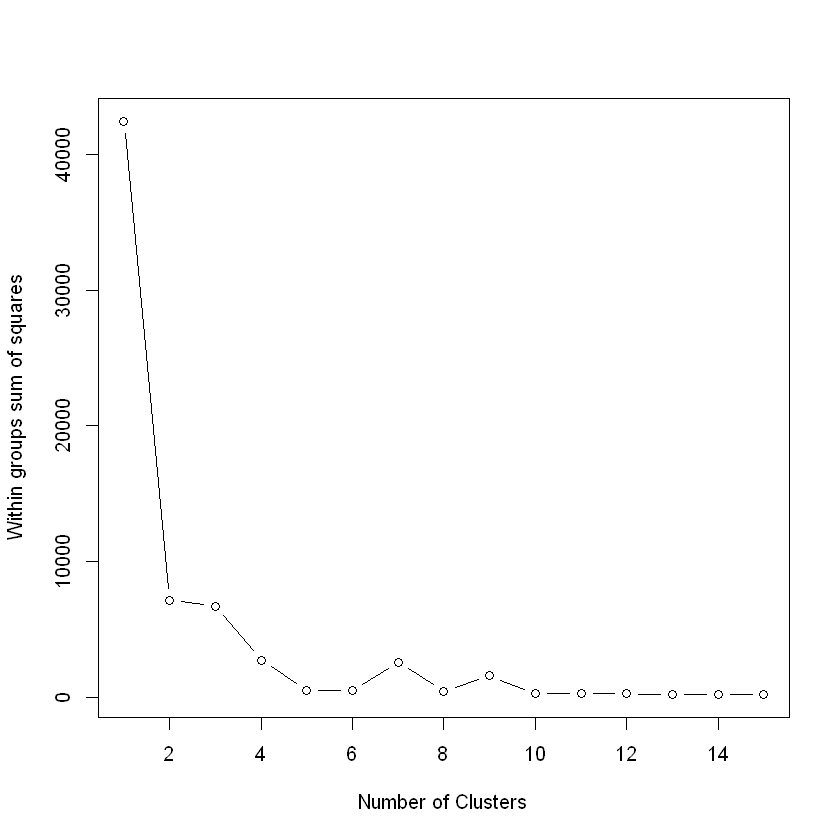

In [54]:
elbow.df = k.find.df
#Determine number of clusters
wss = (nrow(elbow.df)-1)*sum(apply(elbow.df,2,var))

for(i in 2:15) wss[i] = sum(kmeans(elbow.df,centers=i)$withinss)
plot(1:15,wss,type='b',xlab="Number of Clusters", ylab="Within groups sum of squares")

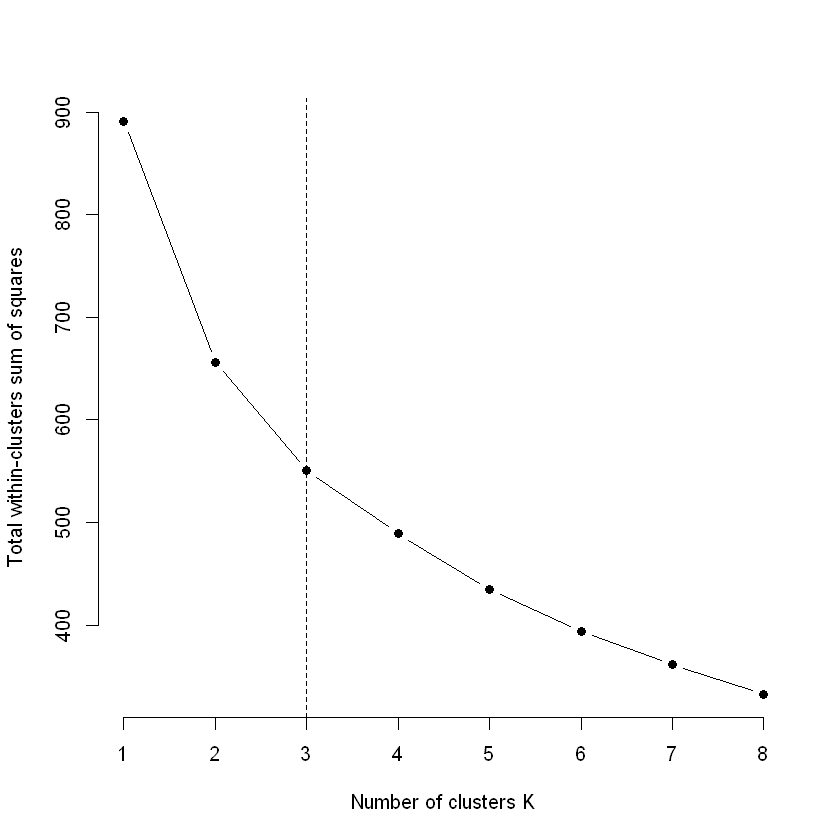

In [55]:
max.k = 8 #Max number of clusters
df = sessions.df.scaled
wss = sapply(1:max.k, function(k){kmeans(df, k, nstart=10)$tot.withinss})
plot(1:max.k, wss, type="b", pch=19, frame=FALSE, xlab="Number of clusters K", ylab="Total within-clusters sum of squares")
abline(v=3,lty=2)

# Use Silhouette plot and Partition around mediods


Silhouette Cluster Estimation:  4 


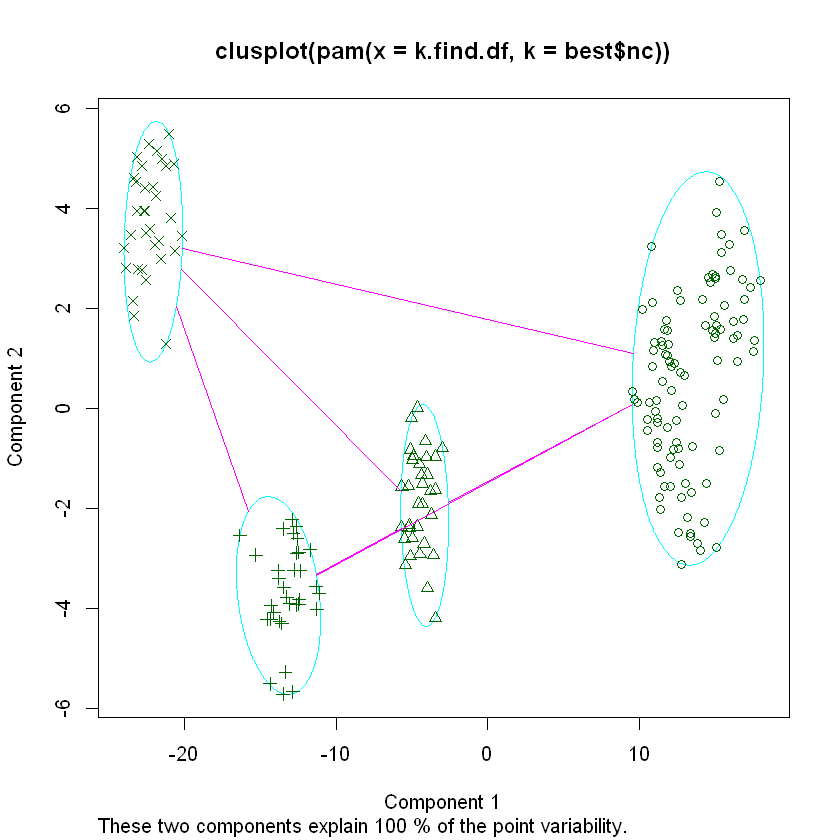

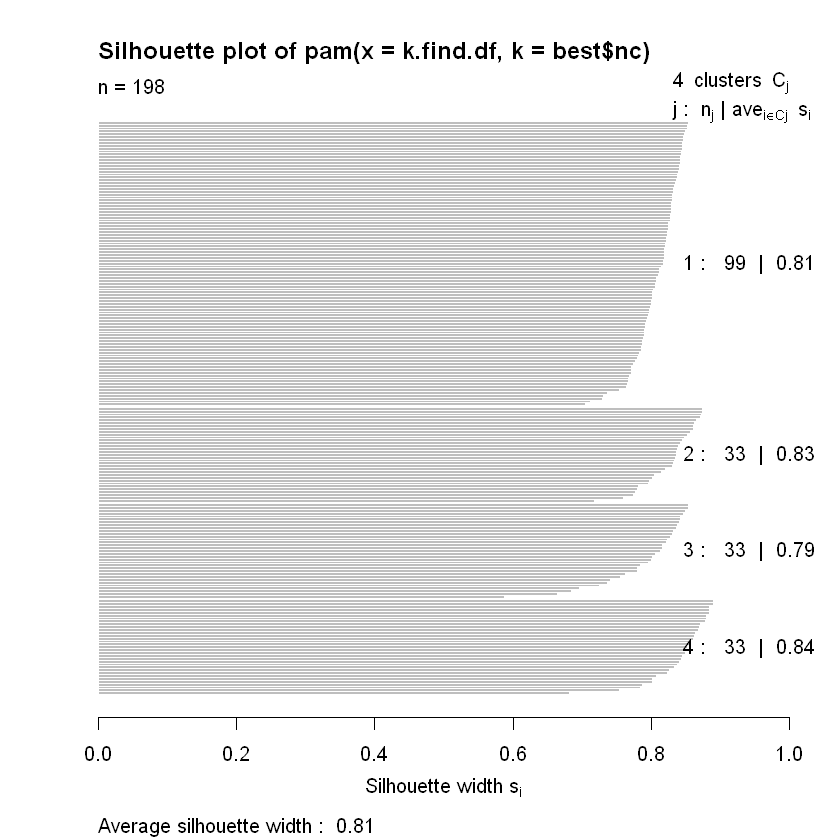

In [56]:
if(!require(fpc)){install.packages("fpc")}
best = pamk(k.find.df)
cat("Silhouette Cluster Estimation: ",best$nc,"\n")
plot(pam(k.find.df,best$nc))

# Partion Clustering Using NbClust

In [57]:
if(!require(NbClust)){install.packages("NbClust")}
set.seed(766)
nb.clust = NbClust(sessions.df.scaled, distance='euclidean', min.nc=2, max.nc=10, method="complete", index="gap")
nb.clust

$All.index
      2       3       4       5       6       7       8       9      10 
-2.2448 -2.8294 -3.1125 -3.4294 -3.7289 -4.1213 -4.2445 -4.2863 -4.3114 

$All.CriticalValues
     2      3      4      5      6      7      8      9     10 
0.5938 0.2947 0.3315 0.3163 0.4146 0.1489 0.0693 0.0531 0.2607 

$Best.nc
Number_clusters     Value_Index 
         2.0000         -2.2448 

$Best.partition
  [1] 1 1 1 2 2 1 1 1 1 1 1 1 2 1 1 2 1 1 2 1 1 1 2 2 2 1 2 2 1 2 2 2 2 1 2 1 2
 [38] 2 2 2 2 2 2 2 2 2 2 2 1 1 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 1 2 2 1 2 2 2 2 1
 [75] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2

In [58]:
#gap statistic values
nb.clust$All.index

2       3       4       5       6       7       8       9      10 
-2.2448 -2.8294 -3.1125 -3.4294 -3.7289 -4.1213 -4.2445 -4.2863 -4.3114

In [59]:
#best number of clusters
nb.clust$Best.nc

Number_clusters     Value_Index 
         2.0000         -2.2448

In [60]:
nb.clust$Best.partition

[1] 1 1 1 2 2 1 1 1 1 1 1 1 2 1 1 2 1 1 2 1 1 1 2 2 2 1 2 2 1 2 2 2 2 1 2 1 2
 [38] 2 2 2 2 2 2 2 2 2 2 2 1 1 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 1 2 2 1 2 2 2 2 1
 [75] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2

# Hubert Index - Graphical method of determining the number of clusters

*** : The Hubert index is a graphical method of determining the number of clusters.
                In the plot of Hubert index, we seek a significant knee that corresponds to a 
                significant increase of the value of the measure i.e the significant peak in Hubert
                index second differences plot. 
 


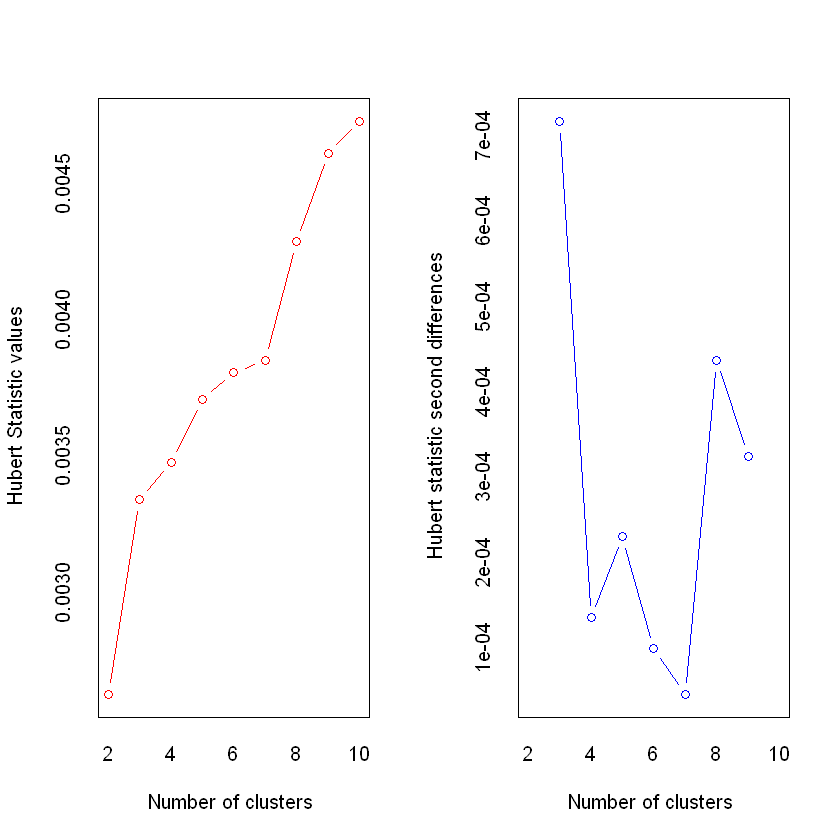

*** : The D index is a graphical method of determining the number of clusters. 
                In the plot of D index, we seek a significant knee (the significant peak in Dindex
                second differences plot) that corresponds to a significant increase of the value of
                the measure. 
 
******************************************************************* 
* Among all indices:                                                
* 1 proposed 2 as the best number of clusters 
* 10 proposed 3 as the best number of clusters 
* 2 proposed 4 as the best number of clusters 
* 1 proposed 7 as the best number of clusters 
* 2 proposed 9 as the best number of clusters 
* 7 proposed 10 as the best number of clusters 

                   ***** Conclusion *****                            
 
* According to the majority rule, the best number of clusters is  3 
 
 
******************************************************************* 


$All.index
        KL      CH Hartigan     CCC     Scott      Marriot    TrCovW   TraceW
2   0.1522 18.9115  28.0068 -3.7783  169.3116 4.058139e+16 10735.488 746.8725
3   2.7303 25.8945  13.4851 -0.6313  350.2158 1.495727e+16  5348.327 580.8696
4  17.5093 23.9089   5.2765 -0.1254  454.9175 9.332891e+15  3771.162 509.9723
5   0.0722 20.0256   9.6180 -1.4021  499.1660 9.368438e+15  3434.591 483.4026
6   1.1271 19.3601   8.5068 -0.5711  653.7471 2.875362e+15  3029.985 438.9611
7   0.6282 18.8090  11.7694  0.2531  714.1314 2.139639e+15  2654.588 402.5325
8   1.3653 19.6303   9.3917  2.3437  826.7441 9.062616e+14  2120.179 357.3136
9   1.2514 19.8854   7.9779  3.8792 1037.1951 1.398240e+14  1975.092 324.2163
10  1.5809 19.8909   5.7103  4.9118 1100.4879 9.166837e+13  1669.811 298.0836
   Friedman  Rubin Cindex     DB Silhouette   Duda Pseudot2  Beale Ratkowsky
2    4.7689 1.1930 0.6491 1.9635     0.1706 0.7133  28.5347 2.3799    0.2480
3   13.5465 1.5339 0.6053 1.8438     0.2190 0.7686  13.5490 1.7687    0.3180
4   18.1993 1.7472 0.5980 1.7127     0.2124 0.8417   4.7025 1.0861    0.3171
5   20.3460 1.8432 0.6245 1.9292     0.1971 0.5852  13.4666 4.0433    0.2954
6   36.8864 2.0298 0.6086 1.7917     0.1890 0.5217  11.9199 5.1128    0.2844
7   38.3277 2.2135 0.6014 1.5782     0.2076 0.5761  17.6574 4.2413    0.2762
8   45.9781 2.4936 0.5770 1.5310     0.2512 0.7421   8.3413 2.0036    0.2699
9   70.2393 2.7482 0.5243 1.4994     0.2682 0.5985   6.7074 3.6616    0.2617
10  72.5877 2.9891 0.5047 1.3719     0.2827 0.5170   6.5407 4.9095    0.2544
       Ball Ptbiserial   Frey McClain   Dunn Hubert SDindex Dindex   SDbw
2  373.4362     0.3523 0.0715  0.5515 0.3779 0.0026  1.3925 2.7168 0.8532
3  193.6232     0.5412 0.3128  1.3384 0.3626 0.0033  1.3286 2.3690 0.7422
4  127.4931     0.5628 0.2728  2.1276 0.3902 0.0035  1.2398 2.2220 0.7063
5   96.6805     0.5648 0.1117  2.5365 0.4239 0.0037  1.3842 2.1652 0.6999
6   73.1602     0.5771 0.1284  2.7577 0.4270 0.0038  1.3228 2.0564 0.6477
7   57.5046     0.5831 0.2959  2.9139 0.4313 0.0038  1.1305 1.9584 0.5892
8   44.6642     0.5688 0.1124  3.5555 0.4340 0.0043  1.2181 1.8020 0.5389
9   36.0240     0.5799 0.0375  4.2675 0.4343 0.0046  1.1996 1.7172 0.5345
10  29.8084     0.5912 0.0393  4.4044 0.4353 0.0047  1.1645 1.6529 0.5217

$All.CriticalValues
   CritValue_Duda CritValue_PseudoT2 Fvalue_Beale
2          0.7608            22.3171       0.0119
3          0.7194            17.5547       0.0723
4          0.6523            13.3238       0.3739
5          0.6153            11.8814       0.0001
6          0.5577            10.3089       0.0000
7          0.6471            13.0908       0.0000
8          0.6471            13.0908       0.0402
9          0.5139             9.4601       0.0006
10         0.4496             8.5690       0.0001

$Best.nc
                     KL      CH Hartigan     CCC    Scott      Marriot   TrCovW
Number_clusters  4.0000  3.0000   3.0000 10.0000   9.0000 3.000000e+00    3.000
Value_Index     17.5093 25.8945  14.5216  4.9118 210.4509 1.999974e+16 5387.161
                 TraceW Friedman   Rubin  Cindex      DB Silhouette   Duda
Number_clusters  3.0000   9.0000  3.0000 10.0000 10.0000    10.0000 3.0000
Value_Index     95.1055  24.2612 -0.1277  0.5047  1.3719     0.2827 0.7686
                PseudoT2  Beale Ratkowsky    Ball PtBiserial Frey McClain
Number_clusters    3.000 4.0000     3.000   3.000    10.0000    1  2.0000
Value_Index       13.549 1.0861     0.318 179.813     0.5912   NA  0.5515
                   Dunn Hubert SDindex Dindex    SDbw
Number_clusters 10.0000      0  7.0000      0 10.0000
Value_Index      0.4353      0  1.1305      0  0.5217

$Best.partition
  [1] 1 1 1 2 2 1 1 1 1 1 1 1 2 1 1 2 1 1 2 1 1 1 2 2 2 1 2 2 1 2 2 2 3 1 2 1 2
 [38] 3 3 2 2 3 3 2 3 3 3 2 1 1 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 1 2 2 1 2 2 2 2 1
 [75] 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3

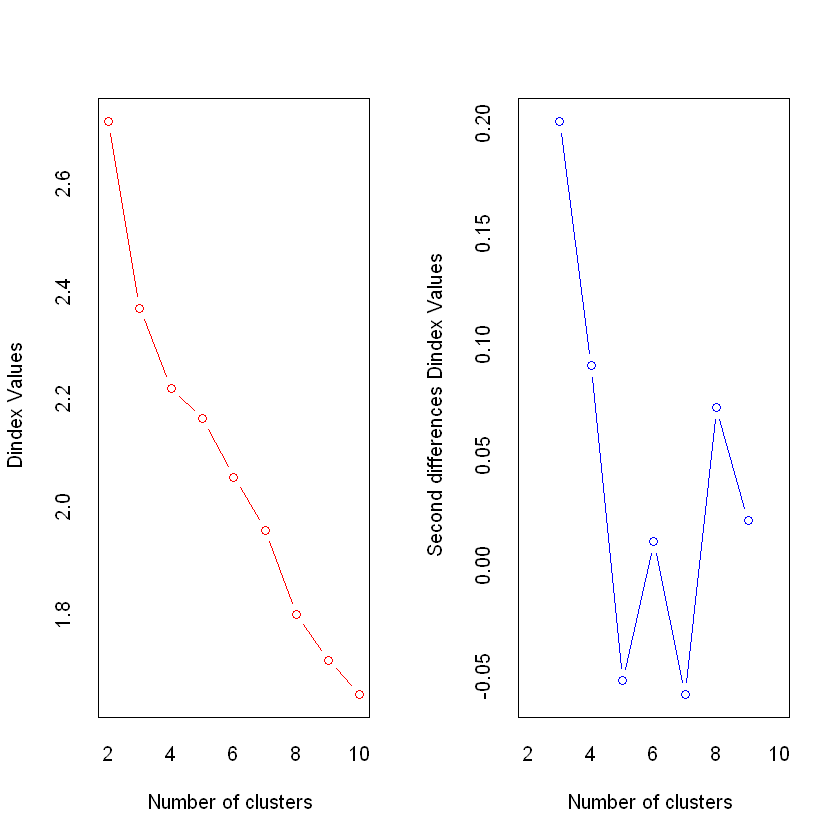

In [61]:
hbrt = NbClust(sessions.df.scaled,distance="euclidean", min.nc=2, max.nc=10,method='complete',index='all')
hbrt

Among all indices: 
* 2 proposed  0 as the best number of clusters
* 1 proposed  1 as the best number of clusters
* 1 proposed  2 as the best number of clusters
* 10 proposed  3 as the best number of clusters
* 2 proposed  4 as the best number of clusters
* 1 proposed  7 as the best number of clusters
* 2 proposed  9 as the best number of clusters
* 7 proposed  10 as the best number of clusters

Conclusion
* According to the majority rule, the best number of clusters is  3 .



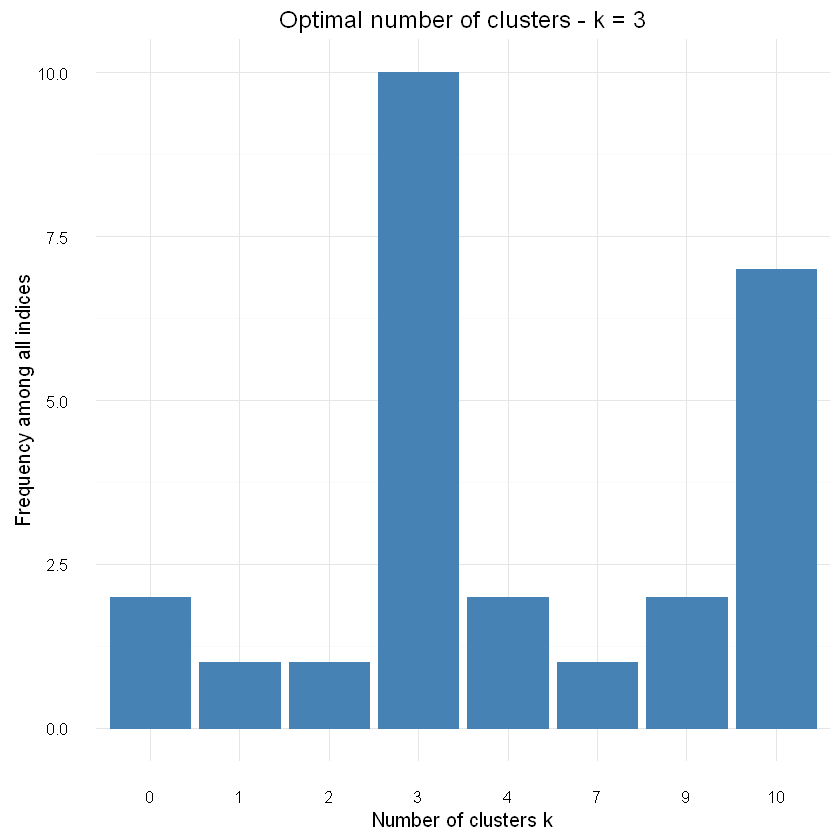

In [62]:
fviz_nbclust(hbrt) + theme_minimal()

# Best Cluster Size (3) - Cluster Analysis

kcca object of family 'kmeans' 

call:
kcca(x = sessions.df[sessions.df[["train"]] == TRUE, 1:2], k = 3, 
    family = kccaFamily("kmeans"))

cluster sizes:

 1  2  3 
14 31 25 


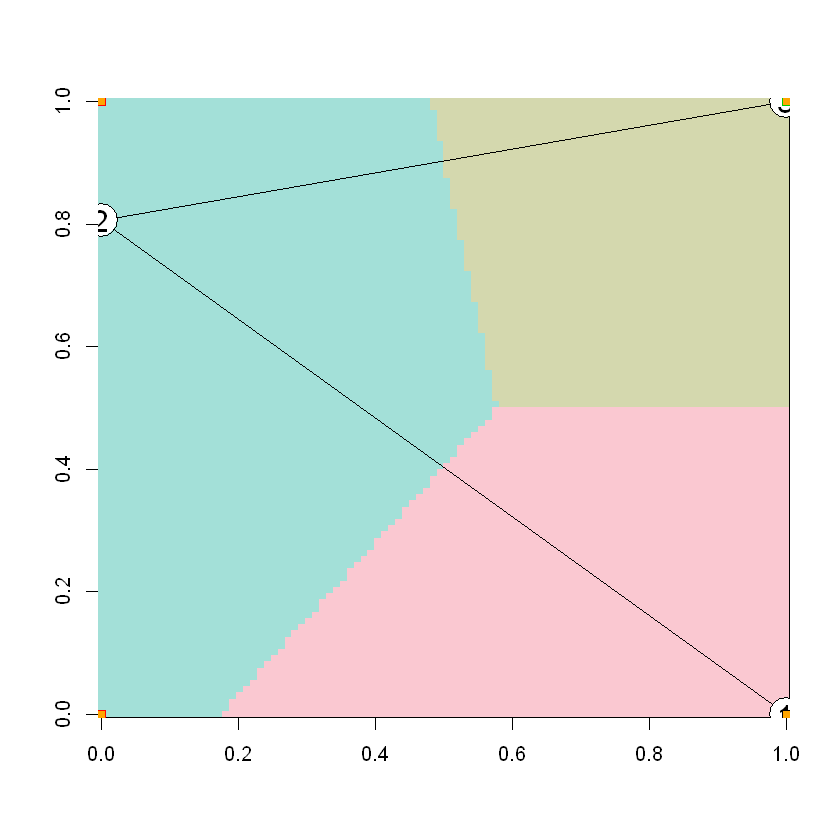

In [78]:
# Clear objects from Memory
rm(list=ls())
# Clear Console:
cat("\014")

# Read Data Source
read.data = function(file=file){
  read.csv(file,header = TRUE,stringsAsFactors = FALSE)
}
sessions.df = read.data('Sessions.csv')
if(!require(dplyr)){install.packages("dplyr")}
if(!require(flexclust)){install.packages("flexclust")}

set.seed(1)
ind = sample(nrow(sessions.df), 30)
sessions.df[["train"]] = TRUE
sessions.df[["train"]][ind] = FALSE

cl3 = kcca(sessions.df[sessions.df[["train"]] == TRUE, 1:2], k=3, kccaFamily("kmeans"))
cl3

pred.train <- predict(cl3)
pred.test <- predict(cl3, newdata=sessions.df[sessions.df[["train"]]==FALSE, 1:2])

image(cl3)
points(sessions.df[sessions.df[["train"]]==TRUE, 1:2], col=pred.train, pch=19, cex=0.3)
points(sessions.df[sessions.df[["train"]]==FALSE, 1:2], col=pred.test, pch=22, bg="orange")



In [79]:
k3 = kmeans(sessions.df,3) # 3 clusters
k3
#get cluster means
aggregate(sessions.df,by=list(k3$cluster),FUN=mean)
#append cluster assignment
sessions.df = data.frame(sessions.df,k3$cluster)
head(sessions.df)

K-means clustering with 3 clusters of sizes 24, 45, 31

Cluster means:
        Home  Products    Search     Prod_A    Prod_B    Prod_C      Cart
1 0.87500000 0.6666667 0.4166667 0.75000000 0.5000000 0.3750000 0.5416667
2 0.84444444 0.5777778 0.5111111 0.73333333 0.2666667 0.3555556 0.7555556
3 0.03225806 0.9677419 0.3225806 0.06451613 1.0000000 0.6451613 0.4516129
   Purchase     train
1 0.3750000 0.0000000
2 0.4666667 1.0000000
3 0.2903226 0.8064516

Clustering vector:
  [1] 1 2 2 2 2 1 2 2 2 1 2 2 2 2 2 1 1 2 1 1 1 2 2 2 1 3 1 1 1 2 2 1 2 1 2 2 1
 [38] 3 3 3 3 3 3 3 3 3 3 2 2 2 1 2 2 2 3 2 1 1 2 2 1 1 1 2 2 2 1 2 2 2 2 2 2 2
 [75] 1 2 2 2 2 3 1 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3

Within cluster sum of squares by cluster:
[1] 41.50000 75.55556 36.58065
 (between_SS / total_SS =  27.4 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

Group.1,Home,Products,Search,Prod_A,Prod_B,Prod_C,Cart,Purchase,train
1,0.87500000,0.6666667,0.4166667,0.75000000,0.5000000,0.3750000,0.5416667,0.3750000,0.0000000
2,0.84444444,0.5777778,0.5111111,0.73333333,0.2666667,0.3555556,0.7555556,0.4666667,1.0000000
3,0.03225806,0.9677419,0.3225806,0.06451613,1.0000000,0.6451613,0.4516129,0.2903226,0.8064516


Home,Products,Search,Prod_A,Prod_B,Prod_C,Cart,Purchase,train,k3.cluster
1,0,0,0,0,0,0,0,FALSE,1
1,1,1,0,0,0,1,0,TRUE,2
1,0,0,0,0,0,0,0,TRUE,2
1,1,1,1,0,0,1,1,TRUE,2
1,0,1,1,1,0,1,1,TRUE,2
1,1,1,0,1,0,0,0,FALSE,1


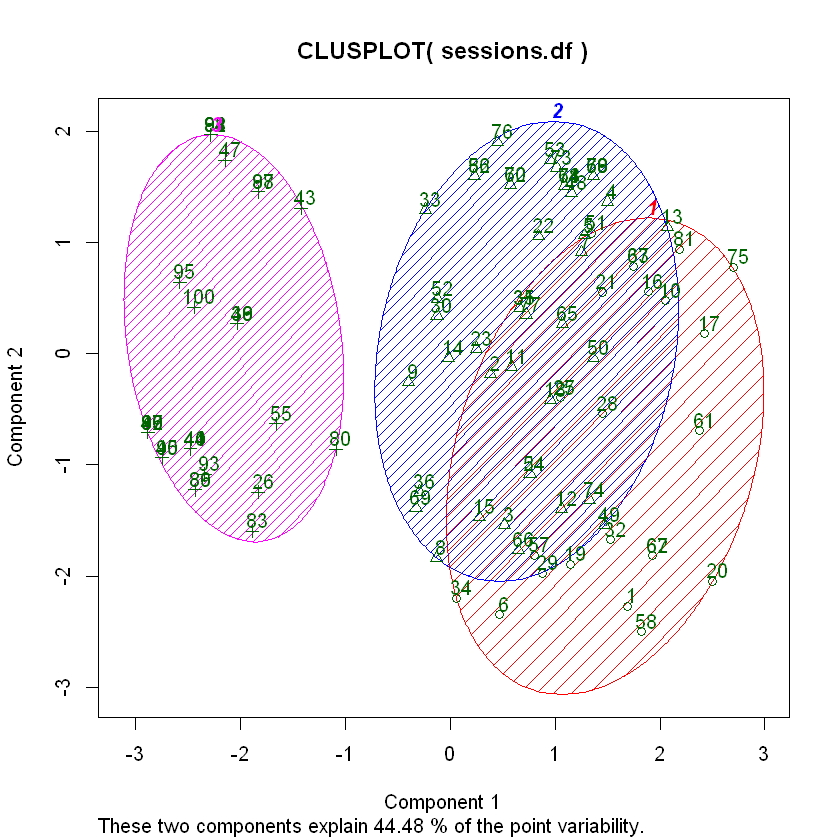

In [80]:
if(!require(cluster)){install.packages("cluster")}
#plot cluster
clusplot(sessions.df,k3$cluster,color=TRUE,shade=TRUE,labels=2,lines=0)


In [81]:
df.c1 = sessions.df[which(sessions.df$k3.cluster == 1),]
nrow(df.c1)
#head(df.c1)
# Path 1 - Home => Search => Prod_B
q1.c1 = df.c1[which(df.c1$Home == 1 & df.c1$Search == 1 & df.c1$Prod_B == 1),]
q1.c1.percent = round(nrow(q1.c1)/nrow(df.c1)*100,2)
paste0("Q1 Path Observations:",nrow(q1.c1)," of ",nrow(df.c1), " Q1 Path Frequencey: ",q1.c1.percent,"%")
q1.c1
# What Product next, Prod_A?
q1.c1.prod_a = q1.c1[which(q1.c1$Prod_A == 1),]
paste0("Prod_A Observations of Q1 Path: ",nrow(q1.c1.prod_a),' of ', nrow(q1.c1))
q1.c1.prod_a

# What Product next, Prod_C?
q1.c1.prod_c = q1.c1[which(q1.c1$Prod_C == 1),]
paste0("Prod_C Observations of Q1 Path: ",nrow(q1.c1.prod_c),' of ', nrow(q1.c1))
q1.c1.prod_c

# Path 2 - Products => Prod_B
q1.c1.p = df.c1[which(df.c1$Home == 1 & df.c1$Search == 1 & df.c1$Prod_B == 1),]

[1] 24

[1] "Q1 Path Observations:5 of 24 Q1 Path Frequencey: 20.83%"

,Home,Products,Search,Prod_A,Prod_B,Prod_C,Cart,Purchase,train,k3.cluster
6,1,1,1,0,1,0,0,0,FALSE,1
10,1,0,1,1,1,1,1,1,FALSE,1
16,1,1,1,1,1,0,1,1,FALSE,1
29,1,1,1,1,1,1,0,0,FALSE,1
34,1,1,1,0,1,1,0,0,FALSE,1


[1] "Prod_A Observations of Q1 Path: 3 of 5"

,Home,Products,Search,Prod_A,Prod_B,Prod_C,Cart,Purchase,train,k3.cluster
10,1,0,1,1,1,1,1,1,FALSE,1
16,1,1,1,1,1,0,1,1,FALSE,1
29,1,1,1,1,1,1,0,0,FALSE,1


[1] "Prod_C Observations of Q1 Path: 3 of 5"

,Home,Products,Search,Prod_A,Prod_B,Prod_C,Cart,Purchase,train,k3.cluster
10,1,0,1,1,1,1,1,1,FALSE,1
29,1,1,1,1,1,1,0,0,FALSE,1
34,1,1,1,0,1,1,0,0,FALSE,1


In [83]:
df.c2 = sessions.df[which(sessions.df$k3.cluster == 2),]
nrow(df.c2)
#head(df.c2)
q1.c2 = df.c2[which(df.c2$Home == 1 & df.c2$Search == 1 & df.c2$Prod_B == 1),]
q1.c2.percent = round(nrow(q1.c2)/nrow(df.c2)*100,2)
paste0("Q1 Path Observations:",nrow(q1.c2)," of ",nrow(df.c2), " Q1 Path Frequencey: ",q1.c2.percent, '%')
q1.c2

# What Product next, Prod_A?
q1.c2.prod_a = q1.c2[which(q1.c2$Prod_A == 1),]
paste0("Prod_A Observations of Q1 Path: ",nrow(q1.c2.prod_a),' of ', nrow(q1.c2))
q1.c2.prod_a

# What Product next, Prod_C?
q1.c2.prod_c = q1.c2[which(q1.c2$Prod_C == 1),]
paste0("Prod_C Observations of Q1 Path: ",nrow(q1.c2.prod_c),' of ', nrow(q1.c2))
q1.c2.prod_c

[1] 45

[1] "Q1 Path Observations:6 of 45 Q1 Path Frequencey: 13.33%"

,Home,Products,Search,Prod_A,Prod_B,Prod_C,Cart,Purchase,train,k3.cluster
5,1,0,1,1,1,0,1,1,TRUE,2
8,1,0,1,0,1,0,0,0,TRUE,2
9,1,1,1,0,1,0,1,0,TRUE,2
11,1,0,1,1,1,1,1,0,TRUE,2
15,1,0,1,1,1,1,0,0,TRUE,2
36,1,1,1,1,1,1,0,0,TRUE,2


[1] "Prod_A Observations of Q1 Path: 4 of 6"

,Home,Products,Search,Prod_A,Prod_B,Prod_C,Cart,Purchase,train,k3.cluster
5,1,0,1,1,1,0,1,1,TRUE,2
11,1,0,1,1,1,1,1,0,TRUE,2
15,1,0,1,1,1,1,0,0,TRUE,2
36,1,1,1,1,1,1,0,0,TRUE,2


[1] "Prod_C Observations of Q1 Path: 3 of 6"

,Home,Products,Search,Prod_A,Prod_B,Prod_C,Cart,Purchase,train,k3.cluster
11,1,0,1,1,1,1,1,0,TRUE,2
15,1,0,1,1,1,1,0,0,TRUE,2
36,1,1,1,1,1,1,0,0,TRUE,2


In [86]:
df.c3 = sessions.df[which(sessions.df$k3.cluster == 3),]
nrow(df.c3)
#head(df.c3)
q1.c3 = df.c3[which(df.c3$Home == 1 & df.c3$Search == 1 & df.c3$Prod_B == 1),]
q1.c3.percent = round(nrow(q1.c3)/nrow(df.c3)*100,2)
paste0("Q1 Path Observations:",nrow(q1.c3)," of ",nrow(df.c3), " Q1 Path Frequencey: ",q1.c3.percent, '')
q1.c3

# What Product next, Prod_A?
q1.c3.prod_a = q1.c3[which(q1.c3$Prod_A == 1),]
paste0("Prod_A Observations of Q1 Path: ",nrow(q1.c3.prod_a),' of ', nrow(q1.c3))
q1.c3.prod_a

# What Product next, Prod_C?
q1.c3.prod_c = q1.c3[which(q1.c3$Prod_C == 1),]
paste0("Prod_C Observations of Q1 Path: ",nrow(q1.c3.prod_c),' of ', nrow(q1.c3))
q1.c3.prod_c


[1] 31

[1] "Q1 Path Observations:1 of 31 Q1 Path Frequencey: 3.23%"

,Home,Products,Search,Prod_A,Prod_B,Prod_C,Cart,Purchase,train,k3.cluster
26,1,1,1,0,1,1,0,0,TRUE,3


[1] "Prod_A Observations of Q1 Path: 0 of 1"

Home,Products,Search,Prod_A,Prod_B,Prod_C,Cart,Purchase,train,k3.cluster


[1] "Prod_C Observations of Q1 Path: 1 of 1"

,Home,Products,Search,Prod_A,Prod_B,Prod_C,Cart,Purchase,train,k3.cluster
26,1,1,1,0,1,1,0,0,TRUE,3


# Path 2 - Product => Prod_C

In [95]:
df.c1.p2 = sessions.df[which(sessions.df$k3.cluster == 1),]
q1.c1.p2 = df.c1.p2[which(df.c1.p2$Product == 1 & df.c1.p2$Prod_C == 1),]
q1.c1.p2.percent = round(nrow(q1.c1.p2)/nrow(df.c1.p2)*100,2)
paste0("Q1.b Path Observations:",nrow(q1.c1.p2)," of ",nrow(df.c1.p2), " Q1.b Path Frequencey: ",q1.c1.p2.percent, '%')
q1.c1.p2

# What Product next, Prod_A?
q1.c1.p2.prod_a = q1.c1.p2[which(q1.c1.p2$Prod_A == 1),]
paste0("Prod_A Observations of Q1.b Path: ",nrow(q1.c1.p2.prod_a),' of ', nrow(q1.c1.p2))
q1.c1.p2.prod_a

# What Product next, Prod_C?
q1.c1.p2.prod_b = q1.c1.p2[which(q1.c1.p2$Prod_B == 1),]
paste0("Prod_B Observations of Q1.b Path: ",nrow(q1.c1.p2.prod_b),' of ', nrow(q1.c1.p2))
q1.c1.p2.prod_b

[1] "Q1.b Path Observations:7 of 24 Q1.b Path Frequencey: 29.17%"

,Home,Products,Search,Prod_A,Prod_B,Prod_C,Cart,Purchase,train,k3.cluster
21,1,1,1,0,0,1,1,1,FALSE,1
25,1,1,0,1,1,1,1,0,FALSE,1
27,1,1,0,1,1,1,1,0,FALSE,1
29,1,1,1,1,1,1,0,0,FALSE,1
32,1,1,0,1,0,1,0,0,FALSE,1
34,1,1,1,0,1,1,0,0,FALSE,1
51,0,1,1,1,0,1,1,1,FALSE,1


[1] "Prod_A Observations of Q1.b Path: 5 of 7"

,Home,Products,Search,Prod_A,Prod_B,Prod_C,Cart,Purchase,train,k3.cluster
25,1,1,0,1,1,1,1,0,FALSE,1
27,1,1,0,1,1,1,1,0,FALSE,1
29,1,1,1,1,1,1,0,0,FALSE,1
32,1,1,0,1,0,1,0,0,FALSE,1
51,0,1,1,1,0,1,1,1,FALSE,1


[1] "Prod_B Observations of Q1.b Path: 4 of 7"

,Home,Products,Search,Prod_A,Prod_B,Prod_C,Cart,Purchase,train,k3.cluster
25,1,1,0,1,1,1,1,0,FALSE,1
27,1,1,0,1,1,1,1,0,FALSE,1
29,1,1,1,1,1,1,0,0,FALSE,1
34,1,1,1,0,1,1,0,0,FALSE,1


In [93]:
df.c2.p2 = sessions.df[which(sessions.df$k3.cluster == 2),]
q1.c2.p2 = df.c2.p2[which(df.c2.p2$Product == 1 & df.c2.p2$Prod_C == 1),]
q1.c2.p2.percent = round(nrow(q1.c2.p2)/nrow(df.c2.p2)*100,2)
paste0("Q1.b Path Observations:",nrow(q1.c2.p2)," of ",nrow(df.c2.p2), " Q1.b Path Frequencey: ",q1.c2.p2.percent, '%')
q1.c2.p2

# What Product next, Prod_A?
q1.c2.p2.prod_a = q1.c2.p2[which(q1.c2.p2$Prod_A == 1),]
paste0("Prod_A Observations of Q1.b Path: ",nrow(q1.c2.p2.prod_a),' of ', nrow(q1.c2.p2))
q1.c2.p2.prod_a

# What Product next, Prod_C?
q1.c2.p2.prod_b = q1.c2.p2[which(q1.c2.p2$Prod_B == 1),]
paste0("Prod_B Observations of Q1.b Path: ",nrow(q1.c2.p2.prod_b),' of ', nrow(q1.c2.p2))
q1.c2.p2.prod_b

[1] "Q1.b Path Observations:11 of 45 Q1.b Path Frequencey: 24.44%"

,Home,Products,Search,Prod_A,Prod_B,Prod_C,Cart,Purchase,train,k3.cluster
14,1,1,1,0,0,1,1,0,TRUE,2
30,1,1,0,1,1,1,1,0,TRUE,2
31,1,1,0,1,0,1,1,0,TRUE,2
35,1,1,0,1,0,1,1,0,TRUE,2
36,1,1,1,1,1,1,0,0,TRUE,2
52,0,1,1,1,0,1,1,0,TRUE,2
53,1,1,0,1,0,1,1,1,TRUE,2
64,1,1,1,1,0,1,1,1,TRUE,2
69,1,1,1,0,0,1,0,0,TRUE,2
71,1,1,1,1,0,1,1,1,TRUE,2


[1] "Prod_A Observations of Q1.b Path: 9 of 11"

,Home,Products,Search,Prod_A,Prod_B,Prod_C,Cart,Purchase,train,k3.cluster
30,1,1,0,1,1,1,1,0,TRUE,2
31,1,1,0,1,0,1,1,0,TRUE,2
35,1,1,0,1,0,1,1,0,TRUE,2
36,1,1,1,1,1,1,0,0,TRUE,2
52,0,1,1,1,0,1,1,0,TRUE,2
53,1,1,0,1,0,1,1,1,TRUE,2
64,1,1,1,1,0,1,1,1,TRUE,2
71,1,1,1,1,0,1,1,1,TRUE,2
78,1,1,1,1,0,1,1,1,TRUE,2


[1] "Prod_C Observations of Q1.b Path: 11 of 11"

,Home,Products,Search,Prod_A,Prod_B,Prod_C,Cart,Purchase,train,k3.cluster
14,1,1,1,0,0,1,1,0,TRUE,2
30,1,1,0,1,1,1,1,0,TRUE,2
31,1,1,0,1,0,1,1,0,TRUE,2
35,1,1,0,1,0,1,1,0,TRUE,2
36,1,1,1,1,1,1,0,0,TRUE,2
52,0,1,1,1,0,1,1,0,TRUE,2
53,1,1,0,1,0,1,1,1,TRUE,2
64,1,1,1,1,0,1,1,1,TRUE,2
69,1,1,1,0,0,1,0,0,TRUE,2
71,1,1,1,1,0,1,1,1,TRUE,2


In [96]:
df.c3.p2 = sessions.df[which(sessions.df$k3.cluster == 3),]
q1.c3.p2 = df.c3.p2[which(df.c3.p2$Product == 1 & df.c3.p2$Prod_C == 1),]
q1.c3.p2.percent = round(nrow(q1.c3.p2)/nrow(df.c3.p2)*100,2)
paste0("Q1.b Path Observations:",nrow(q1.c3.p2)," of ",nrow(df.c3.p2), " Q1.b Path Frequencey: ",q1.c3.p2.percent, '%')
q1.c3.p2

# What Product next, Prod_A?
q1.c3.p2.prod_a = q1.c3.p2[which(q1.c3.p2$Prod_A == 1),]
paste0("Prod_A Observations of Q1.b Path: ",nrow(q1.c3.p2.prod_a),' of ', nrow(q1.c3.p2))
q1.c3.p2.prod_a

# What Product next, Prod_C?
q1.c3.p2.prod_b = q1.c3.p2[which(q1.c3.p2$Prod_B == 1),]
paste0("Prod_B Observations of Q1.b Path: ",nrow(q1.c3.p2.prod_b),' of ', nrow(q1.c3.p2))
q1.c3.p2.prod_b

[1] "Q1.b Path Observations:20 of 31 Q1.b Path Frequencey: 64.52%"

,Home,Products,Search,Prod_A,Prod_B,Prod_C,Cart,Purchase,train,k3.cluster
26,1,1,1,0,1,1,0,0,TRUE,3
42,0,1,0,0,1,1,0,0,TRUE,3
45,0,1,1,0,1,1,0,0,TRUE,3
47,0,1,1,0,1,1,1,1,TRUE,3
84,0,1,0,0,1,1,1,1,TRUE,3
85,0,1,0,0,1,1,0,0,TRUE,3
86,0,1,0,0,1,1,0,0,FALSE,3
87,0,1,0,0,1,1,0,0,TRUE,3
88,0,1,0,0,1,1,1,1,FALSE,3
89,0,1,0,0,1,1,0,0,FALSE,3


[1] "Prod_A Observations of Q1.b Path: 0 of 20"

Home,Products,Search,Prod_A,Prod_B,Prod_C,Cart,Purchase,train,k3.cluster


[1] "Prod_B Observations of Q1.b Path: 20 of 20"

,Home,Products,Search,Prod_A,Prod_B,Prod_C,Cart,Purchase,train,k3.cluster
26,1,1,1,0,1,1,0,0,TRUE,3
42,0,1,0,0,1,1,0,0,TRUE,3
45,0,1,1,0,1,1,0,0,TRUE,3
47,0,1,1,0,1,1,1,1,TRUE,3
84,0,1,0,0,1,1,1,1,TRUE,3
85,0,1,0,0,1,1,0,0,TRUE,3
86,0,1,0,0,1,1,0,0,FALSE,3
87,0,1,0,0,1,1,0,0,TRUE,3
88,0,1,0,0,1,1,1,1,FALSE,3
89,0,1,0,0,1,1,0,0,FALSE,3


[1] "Home"     "Products" "Search"   "Prod_A"   "Prod_B"   "Prod_C"   "Cart"    
[8] "Purchase"

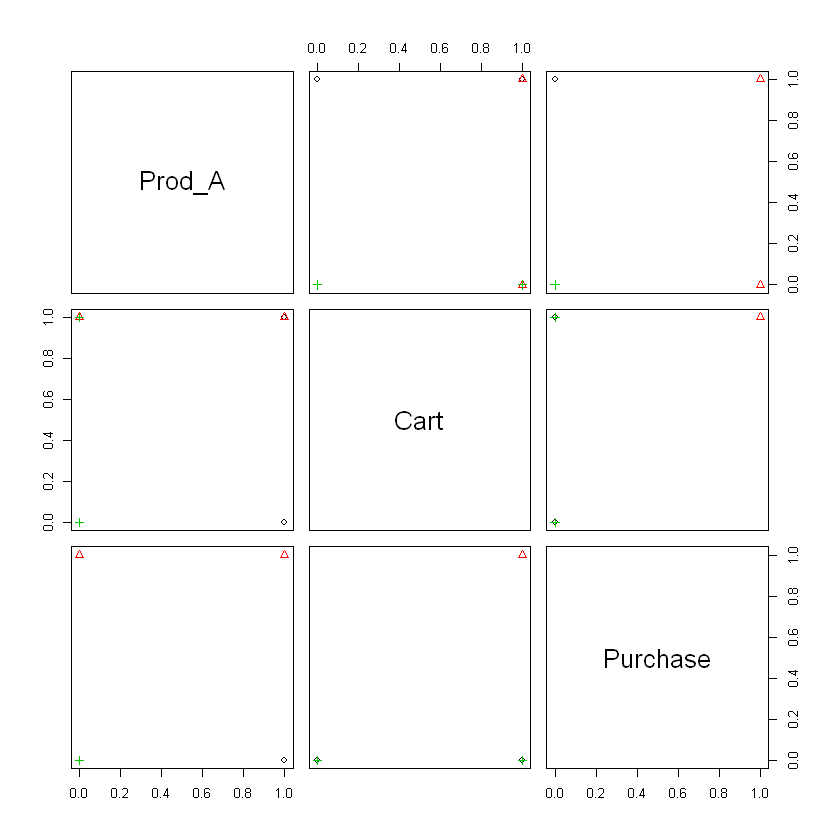

In [14]:
# Clear objects from Memory
rm(list=ls())
# Clear Console:
cat("\014")

# Read Data Source
read.data = function(file=file){
  read.csv(file,header = TRUE,stringsAsFactors = FALSE)
}
sessions.df0 = read.data('Sessions.csv')
names(sessions.df0)
sessions.df1 = sessions.df0[,c('Home','Search','Prod_B')]

sessions.df.pA.p = sessions.df0[,c('Prod_A','Cart','Purchase')]
sessions.df.pB.p = sessions.df0[,c('Prod_B','Cart','Purchase')]
sessions.df.pC.p = sessions.df0[,c('Prod_C','Cart','Purchase')]

pA.p.3m1 = kmeans(sessions.df.pA.p,3,nstart=25)
pA.p.3m2 = kmeans(sessions.df.pA.p,3,nstart=25)
plot(sessions.df.pA.p, pch=pA.p.3m1$cluster,col=pA.p.3m1$cluster)
points(sessions.df.pA.p,pch=pA.p.3m2$cluster+3,col=pA.p.3m2$cluster)